In [196]:
################################
### Imports
################################
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from numpy import arange
from scipy.stats import chisquare

In [197]:
##############################################
### Función Aleatoria para la Fuerza Browniana
##############################################
# Random Func entre 1 y -1 
# Semilla y aleatorizar 
def rand_betw_1_neg1():
    return random.random() * 2 - 1

In [198]:
################################
### Imports
################################
## DESCOMENTAR PARA TEST ALEATORIEDAD!!!!
rand_test_list = list() # Array que almacenará las variables aleatorias que usaremos para el histograma

## Para el test de aleatoriedad tomamos 10 millones de valores 10*1000*1000
## DESCOMENTAR PARA TEST ALEATORIEDAD!!!!
# for j in range(1,10*1000*1000):  
#     rand_test_list.append(round(10 * rand_betw_1_neg1())) # multiplicamos por 10 para el histograma

## Valores distintos y Conteos
## DESCOMENTAR PARA TEST ALEATORIEDAD!!!!
# unique_elements, counts_elements = np.unique(rand_test_list, return_counts=True)
# print(unique_elements, counts_elements)

## Imp Como Los valores pertenecen al intervalo [-1,1] y están redondeados, no tenemos 
## p.e 1.2, 1.4, -1.3, -1.2... Si el comportamiento es realmente aleatorio
## las frecuencias de los extremos serán aproximadamente la mitad
## DESCOMENTAR PARA TEST ALEATORIEDAD!!!!
# plt.hist(rand_test_list, bins=np.shape(unique_elements)[0])
# plt.show()

In [261]:
################################
### Escala de Tiempos
################################
t_i = 0    # Inicio
t_f = 1.0   # Fin
# IMP tener en cuenta el tempo característico
# dt = 1.0e-04  # Paso o incremento de tiempo
dt = 1.0e-04
t = arange(t_i, t_f, dt)  # Array con todos los instantes de tiempo

In [246]:
###############################################################
### Constantes Físicas Universales y Condiciones de Laboratorio
###############################################################
# Temperatura SI (K)
T = 299.5
# Aceleración de la Gravedad SI (m/s^2)
g = 9.78
# Viscosidad Agua a 300K  SI ( kg/(m·s) ) - η = 0.95 mPa.s
eta = 0.95e-3
# Constante de Boltzmann SI (J·K^-1)
k_b = 1.380649e-23 
# IMP γ = 6πηa  ES 2d --> Como en la fuerza browniana!!!!


In [247]:
###################################
### Parámetros Iniciales Brownianos
###################################
# Densidad Del Agua --> rho_w SI kg/m^3
rho_w = 997     
# Densidad De La Partícula
rho_p = 0.95 * rho_w      
# Radio de la partícula SI (m)
a = 1.0e-06   # To-Do a = [0.5e-06, 1.0e-06, 2.0e-06, 4.0e-06]
# Volumen de la partícula SI
V_p = 4.0/3.0 * math.pi * a**3
##
# V_p_ls = list()
# m_p_ls = list()
# for j in a:
#     V_p_ls.append(4.0/3.0 * math.pi * j**3)
# Masa de la Partícula
m = rho_p * V_p
print('masa partícula kg --> ',m)
# Coeficiente de Fricción --> Valor típico gamma = 9.42e-12 m
gamma = 4 * math.pi * eta * a   
# gamma = 0.7
print('gamma --> ',gamma)

# Franja donde se contiene la partícula
l_inf = -50*1e-06
l_sup = 50*1e-06

# Nuestro valor calculado en SI
D = k_b * T/gamma  # 0.46 micras cuadradas /s (agua) 

print('D --> ', D)

tau = ((2*a)**2)/D
print('Tau --> ' ,tau,'s')
# dt = tau/1e3

# kappa --> TEMP Constante de esferas duras
kappa = 1.0e-06
# Separación del origen con las paredes (Las paredes están separadas 100 micras)
z0 = 1/2 * 100*1e-06



masa partícula kg -->  3.9674126424634294e-15
gamma -->  1.1938052083641212e-08
D -->  3.4637508079448543e-13
Tau -->  11.548174859534189 s


In [248]:
print(2.0*k_b*T*gamma/dt)
n = rand_betw_1_neg1()
print(n)

9.872873543065068e-25
-0.1511635740518944


In [249]:
# CI Condiciones Iniciales Partícula (x,v)
# Partícula Parada y en el Origen
x0 = 0.0
v0 = 0.0 

In [256]:
######################################################
### Fuerzas Involucradas: F = F_h + F_g + F_b + F_a 
######################################################
# F_h - Fuerza Hidrodinámica
def F_h(v):
#     print('Valor que le paso a v --> ', v)
# return - gamma * v
    return - gamma * v/1e06

# F_g - Fuerza De La Gravedad
def F_g():
    return  - m * g

# Brownian Stochastic Force - Fuerza Estocástica
# Imp 
def F_b(t):
    n = rand_betw_1_neg1()
    return math.sqrt(2.0*k_b*T*gamma/dt) * n * 1

# F_a - Fuerza de Arquímedes
# Fuerza igual al peso del volumen desalojado --> Va hacia arriba por lo que es +
def F_a():
    return rho_w * V_p * g 


In [257]:
##########################################################
### Ecuación de Langevin
##########################################################
def Langevin(var_v, var_t):
    # Debug
#     print('velocidad', 'F_h/m', 'F_a/m','F_g/m','F_b/m')
#     print('vel -->', var_v, 'Aceleraciones -->',  F_h(var_v)/m ,  F_a()/m , F_g() / m , F_b(var_t)/m)
    return (F_b(var_t) + F_h(var_v)+ F_a() + F_g()) / m  

In [258]:
##########################################################
### Método Para Resolver EDO de Euler
##########################################################
def odeEuler(f, v_vel0, v_x0, t):
    '''Aproximamos la solución de y'=f(y,t) por el método de Euler

    Parameters
    ----------
    f : function  y'=f(t,y), y(t_0)=y_0
    v_vel0 : valor inicial y(t0)=y0 t0 index 0 in the array t
    t : array El time step viene dado por t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    v_vel = np.zeros(len(t))
    v_x = np.zeros(len(t))
    
    v_vel[0] = v_vel0
    v_x[0] = v_x0
    for n in range(0,len(t)-1):
        acel =  f(v_vel[n], t[n])  # <--- POSIBLE FUENTE DE ERROR
        v_vel[n+1] = v_vel[n] + acel * dt  # t[n+1] - t[n] cte --> tomamos dt
        v_x[n+1] = v_x[n] + v_vel[n] * dt
        # Potencial de esferas duras
        if v_x[n+1] >= l_sup:
            v_x[n+1] = l_sup
            v_vel[n+1] = - abs(v_vel[n+1])
        elif v_x[n+1] <= l_inf:
            v_x[n+1] = l_inf
            v_vel[n+1] = abs(v_vel[n+1])
    return v_x, v_vel

In [259]:
# Solucionamos la Ecuación Diferencial
x, v = odeEuler(Langevin, v0, x0, t)

# Plot
x_list = list()
v_list = list()
for j in np.ndenumerate(x):
#     print(j[1], v[j[0][0]])
    x_list.append(j[1])
    v_list.append(v[j[0][0]])


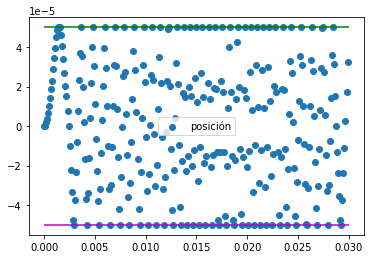

In [260]:
# Plot Results
plt.scatter(t,x_list,label="posición")
# plt.plot(t,x_list,label="posición")
# plt.scatter(t,x_list,label="posición")
# plt.plot(t,v_list,label="velocidad")
plt.hlines(l_sup,t_i,t_f,color ='g')
plt.hlines(l_inf,t_i,t_f,color ='m')
# plt.ylim([30e-06, 50e-06])
plt.legend(loc='best')
plt.show()